# NumPy

## NumPy quickstart

### The Basics
    NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes.

    For example, the coordinates of a point in 3D space [1, 2, 1] has one axis. That axis has 3 elements in it, so we say it has a length of 3. In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

    [[ 1., 0., 0.],  
     [ 0., 1., 2.]]
     
    NumPy’s array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:

    --ndarray.ndim  
        the number of axes (dimensions) of the array.

    --ndarray.shape  
        the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.

    --ndarray.size  
        the total number of elements of the array. This is equal to the product of the elements of shape.

    --ndarray.dtype  
        an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

    --ndarray.itemsize  
        the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

    --ndarray.data  
        the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

#### 1.An example

In [20]:
import numpy as np
a = np.arange(15).reshape(3,5)
print(a)
print(a.ndim)
print(a.dtype.name)
print(a.itemsize)
print(a.size)
print(type(a))
b = np.array([6, 7, 8])
print(b)
print(type(b))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
2
int64
8
15
<class 'numpy.ndarray'>
[6 7 8]
<class 'numpy.ndarray'>


#### 2.Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [21]:
import numpy as np
a = np.array([2, 3, 4])
print(a)
print(a.dtype)
b = np.array([1.2, 3.5, 5.1])
print(b.dtype)

[2 3 4]
int64
float64


A frequent error consists in calling array with multiple arguments, rather than providing a single sequence as an argument.

In [22]:
#WRONG a = np.array(1,2,3,4) 
a = np.array([1,2,3,4]) #RIGHT

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [23]:
b = np.array([(1.5, 2, 3),(4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [24]:
b = np.array([(1.5, 2, 3), (4, 5, 6)])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

The type of the array can also be explicitly specified at creation time:

In [25]:
c = np.array( [ [1,2], [3,4] ], dtype=complex )
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

Often, the elements of an array are originally unknown, but its size is known.Hence, NumPy offers several functions to create arrays with initial placeholder content.These minimize the necessity of growing arrays, an expensive operation.

The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory.By default, the dtype of the created array is float64.

In [26]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [27]:
np.ones((2,3,4), dtype=np.int16) #dtype can also be specified

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [28]:
np.empty((2,3)) #uninitialized

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

To create sequences of numbers, NumPy provides the arrange function which is analogous to the Python built-in range, but returns as array

In [29]:
np.arange(10,30,5)

array([10, 15, 20, 25])

In [30]:
np.arange(0,2,0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

When arange is used with floating point arguments, it is generally not possible to predict the number of elements obtained, due to the finite floating point precision.For this reason, it is usually better to use the function linspace that receives as an argument the number of elements that we want, instead of the step:

In [31]:
from numpy import pi
np.linspace( 0, 2, 9) #9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [32]:
x = np.linspace( 0, 2*pi, 100) #useful to evaluate function at lots of points
f = np.sin(x)
print(x)
print(f)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

#### 3.Printing Arrays

When you print an array, NumPy displays it in a similar way to nested lists, but with the following lay out:  
    ·the last axis is printed from left to right,
    ·the second-to-last is printed from top to bottom,
    ·the rest are also printed from top to bottom, with each slice separated from the next by an empty line.  

One-dimensional arrays are the printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [33]:
a = np.arange(6)
print("a:{}".format(a))
b = np.arange(12).reshape(4,3)
print("b:{}".format(b))
c = np.arange(24).reshape(2, 3, 4)
print("c:{}".format(c))

a:[0 1 2 3 4 5]
b:[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
c:[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


If an array is too large to be printed, NumPy automatically skips the central part of the array and only prints the corner:

In [34]:
print(np.arange(10000))

[   0    1    2 ... 9997 9998 9999]


In [35]:
print(np.arange(10000).reshape(100,100))

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


To disable this behaviour and force NumPy to print entire array, you can change the printing options using set_printoptions.

In [36]:
np.set_printoptions(threshold=sys.maxsize)

NameError: name 'sys' is not defined

#### 4.Basic Operations
    Arithmetic operators on array apply elementwise.A new array is created and filled with the result.

In [37]:
a = np.array( [20,30,40,50] )
b = np.arange(4)
b

array([0, 1, 2, 3])

In [38]:
c = a-b
c

array([20, 29, 38, 47])

In [39]:
b ** 2

array([0, 1, 4, 9])

In [40]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [41]:
a < 35

array([ True,  True, False, False])

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays.The martrix product can be performed using the @ operator ( in python >= 3.5) or the dot function or method:

In [42]:
A = np.array( [[1,1],
              [0,1]] )
B = np.array( [[2,0],
              [3,4]] )

In [43]:
A * B

array([[2, 0],
       [0, 4]])

In [44]:
A @ B

array([[5, 4],
       [3, 4]])

In [45]:
A.dot(B)

array([[5, 4],
       [3, 4]])

Some operations,such as  += and *=  , act in place to modify an existing array rather than create a new one.

In [46]:
rg = np.random.default_rng(1)  #create instance of default random number genrator
a = np.ones((2,3), dtype=int)
b = rg.random((2,3))

In [47]:
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [48]:
b += a
b

array([[3.51182162, 3.9504637 , 3.14415961],
       [3.94864945, 3.31183145, 3.42332645]])

In [49]:
a += b

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one(a behavior known as upcasting).

In [50]:
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, pi, 3)
b.dtype.name

'float64'

In [51]:
c = a+b
c

array([1.        , 2.57079633, 4.14159265])

In [52]:
c.dtype.name

'float64'

In [53]:
d = np.exp(c*1j)
d

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [54]:
d.dtype.name

'complex128'

Many unary operations, such as computong the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [55]:
a = rg.random((2,3))
a

array([[0.82770259, 0.40919914, 0.54959369],
       [0.02755911, 0.75351311, 0.53814331]])

In [56]:
a.sum()

3.1057109529998157

In [57]:
a.min()

0.027559113243068367

In [58]:
a.max()

0.8277025938204418

By defalut, these operations apply to the array as though it were a list of numbers, regardless of its shape. However,by specifying the axis parameter you can apply an operation along the specified axis of an array:

In [59]:
b = np.arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
b.sum(axis=0)

array([12, 15, 18, 21])

In [61]:
b.min(axis=1)

array([0, 4, 8])

In [62]:
b.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

#### 5.Universal Functions


NumPy provides familiar mathmatical functions such as sin,cos,and exp.In NumPy,these are called "universal functions"(u func).Within NumPy,these functions operate elementwise on an array,producing an array as output.

In [63]:
B = np.arange(3)
B

array([0, 1, 2])

In [64]:
np.exp(B)

array([1.        , 2.71828183, 7.3890561 ])

In [65]:
np.sqrt(B)

array([0.        , 1.        , 1.41421356])

In [66]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([2., 0., 6.])

#### 6.Indexing,Slicing and Iterating
One-dimensional arrays can be indexed,sliced and iterated over,much like lists and other Python sequences.

In [67]:
a = np.arange(10) ** 3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [68]:
a[2]

8

In [69]:
a[2:5]

array([ 8, 27, 64])

In [70]:
a[:6:2] = 1000
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729])

In [71]:
a[::-1]

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000])

In [72]:
for i in a:
    print(i**(1/3.))

9.999999999999998
1.0
9.999999999999998
3.0
9.999999999999998
4.999999999999999
5.999999999999999
6.999999999999999
7.999999999999999
8.999999999999998


In [73]:
def f(x,y):
    return 10*x+y

b = np.fromfunction(f, (5,4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [74]:
b[2,3]

23

In [75]:
b[0:5, 1]

array([ 1, 11, 21, 31, 41])

In [76]:
b[:,1]

array([ 1, 11, 21, 31, 41])

In [77]:
b[1:3, :]

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

When fewer indices are provided than the number of axes,the missing indices are considered complete slices

In [78]:
b[-1]

array([40, 41, 42, 43])

The expression within brackets in b[i] is treated as an i followed by as many instances of: as needed to represent the remaining axes.NumPy also allows you to write this using dots as b[i,...].

The dots(...) represent as many colons as needed to produce a complete indexing tuple.For example, if x is an array with 5 axes, then  
·x[1,2,...] is equivalent to x[1,2,:,:,:],  
·x[...,3] to x[:,:,:,:,3]and  
·x[4,...,5,:] to x[4,:,:,5,:]

In [79]:
c = np.array( [[[ 0, 1, 2],
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,133]]])

c.shape

(2, 2, 3)

In [80]:
c[1,...]

array([[100, 101, 102],
       [110, 112, 133]])

In [81]:
c[...,2]

array([[  2,  13],
       [102, 133]])

Iterating over multidimensional arrays is done with respect to the first axis:

In [82]:
for row in b:
    print(row)

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However,if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array

In [83]:
for element in b.flat:
    print(element)

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


### Shape Mainpulation

#### 1.Changing the shape of an array
    An array has a shape given by the number of elements along each axis

In [84]:
a = np.floor(10*rg.random((3,4)))
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [85]:
a.shape

(3, 4)

The shape of an array can be changed with various commands.Note that the following three commands all return a modified array, but do not change the original array:

In [86]:
a.ravel()

array([3., 7., 3., 4., 1., 4., 2., 2., 7., 2., 4., 9.])

In [87]:
a.reshape(6,2)

array([[3., 7.],
       [3., 4.],
       [1., 4.],
       [2., 2.],
       [7., 2.],
       [4., 9.]])

In [88]:
a.T

array([[3., 1., 7.],
       [7., 4., 2.],
       [3., 2., 4.],
       [4., 2., 9.]])

In [89]:
a.T.shape

(4, 3)

In [90]:

a.shape

(3, 4)

The order of the elements in the array resulting from ravel() is normally "C-style", that is, the rightmost index "changes the fastest", so the element after a[0,0] is a[0,1].If the array is reshaped to some other shape, again the array is treated as "C-style".NumPy normally creates array stored in this order, so ravel() will usually not need to copy its argument,  but if the array was made by taking slices of another array or created with unusual options, it may need to be copied. The functions ravel() and reshape() can also be instructed,using an optional argument, to use FORTRAN-style arrays, in which the leftmost index changes the fastest.

The reshape function returns its argument with a modified shape, whereas the ndarray.resize method modifies the array itself

In [91]:
a

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

In [92]:
a.resize((2,6))
a

array([[3., 7., 3., 4., 1., 4.],
       [2., 2., 7., 2., 4., 9.]])

If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated.

In [93]:
a.reshape(3,-1)

array([[3., 7., 3., 4.],
       [1., 4., 2., 2.],
       [7., 2., 4., 9.]])

#### 2.Stacking together different arrays
    Several arrays can be stacked together along different axes

In [94]:
a = np.floor(10*rg.random((2,2)))
a

array([[9., 7.],
       [5., 2.]])

In [95]:
b = np.floor(10*rg.random((2,2)))
b

array([[1., 9.],
       [5., 1.]])

In [96]:
np.vstack((a,b))

array([[9., 7.],
       [5., 2.],
       [1., 9.],
       [5., 1.]])

In [97]:
np.hstack((a,b))

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

The function column_stack stack 1D arrays as columns into a 2D array.It is equivalent to hstack only for 2D arrays:

In [98]:
from numpy import newaxis
np.column_stack((a,b))

array([[9., 7., 1., 9.],
       [5., 2., 5., 1.]])

In [99]:
a = np.array([4.,2.])
b = np.array([3.,8.])
np.column_stack((a,b))

array([[4., 3.],
       [2., 8.]])

In [100]:
np.hstack((a,b))

array([4., 2., 3., 8.])

In [101]:
a[:,newaxis]

array([[4.],
       [2.]])

In [102]:
np.column_stack((a[:,newaxis], b[:,newaxis]))

array([[4., 3.],
       [2., 8.]])

In [103]:
np.hstack((a[:,newaxis], b[:,newaxis]))

array([[4., 3.],
       [2., 8.]])

On the other hand, the function row_stack is equivalent to vstack for any input arrays.In fact, row_stack is an alias for vstack

In [104]:
np.column_stack is  np.hstack

False

In [105]:
np.row_stack is np.vstack

True

In general,for arrays with more than two dimensions, hstack stacks along their second axes,vstack stacks along their first axes, and concatenate allows for an optional arguments giving the number of the axis along which the concatenation should happen.

###### Note
In complex cases,r_ and c_ are useful for creating arrays by stacking numbers along one axis.They allow the useof range literals(".")

In [106]:
np.r_[1:4,0,4]

array([1, 2, 3, 0, 4])

When used with arrays as arguments, r_ and c_ are similar to vstack and hstack in their default behavior, but allow for an optional argument giving the number of the axis along which to concatenate.

#### 3.Splitting one array into sevaral smaller ones
    Using hsplit,you can split an array along its horizontal axis,either by specifying the number of equally shaped arrays to return, or by specifying the columns after which the division should occur:

In [108]:
a = np.floor(10*rg.random((2,12)))
a

array([[6., 7., 6., 9., 0., 5., 4., 0., 6., 8., 5., 2.],
       [8., 5., 5., 7., 1., 8., 6., 7., 1., 8., 1., 0.]])

In [109]:
np.hsplit(a,3)

[array([[6., 7., 6., 9.],
        [8., 5., 5., 7.]]),
 array([[0., 5., 4., 0.],
        [1., 8., 6., 7.]]),
 array([[6., 8., 5., 2.],
        [1., 8., 1., 0.]])]

In [110]:
np.hsplit(a,(3,4))

[array([[6., 7., 6.],
        [8., 5., 5.]]),
 array([[9.],
        [7.]]),
 array([[0., 5., 4., 0., 6., 8., 5., 2.],
        [1., 8., 6., 7., 1., 8., 1., 0.]])]

vsplit splits along the vertical axis,adn array_split allows one to specify along which axis to aplit.

### Copies and Views
    When operating and manipulating arrays, their data is something copied into a new array and sometimes not.This is often a source of confusion for beginners.These are three cases:

#### 1.No Copy at All
    Simple assignments make no copy of objects or their data.

In [111]:
a = np.array([[ 0, 1, 2, 3],
              [ 4, 5, 6, 7],
              [ 8, 9, 10, 11]])
b = a
print(b is a)

True


Python passes mutable objects as references, so function calls make no copy

In [112]:
def f(x):
    print(id(x))

In [113]:
id(a)

140374521103904

In [114]:
f(a)

140374521103904


#### 2.View or Shallow Copy
    Different array onjects can share the same data.The view method creates a new array object that looks at the same data.

In [117]:
c = a.view()
print(c is a)
print(c.base is a)
print(c.flags.owndata)

False
True
False


In [118]:
c = c.reshape((2,6))
a.shape

(3, 4)

In [119]:
c[0,4] = 1234
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

Slicing an array returns a view of it:

In [123]:
s = a[:, 1:3] #space added for clarity; could also be written "s = a[:, 1:3]"
s[:] = 10 #s[:] is a view of s. Note the difference between s = 10 and s[:] = 10
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

#### 3.Deep Copy
    The copy method makes a complete copy of the array its data.

In [124]:
d = a.copy() #a new array object with new data is created
d is a

False

In [126]:
d.base is a #d doesn't share anything with a

False

In [127]:
d[0,0] = 9999
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

Something copy should be called after slicing if the original array is not required anymore. For example, suppose a is a huge intermediate result and the final result b only contains a small fraction of a, a deep copy should be made when constructing b with slicing:

In [128]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a

If b = a[:100] is used instead, a is referenced by b and will persist in memory even if del a is executed.

#### 4.Functions and Methods Overview
    Here is a list of some useful NumPy functions and methods names ordered in categories.See Routines for the full list.
    
    ·Array Creation  
            arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r_, zeros, zeros_like  
            
    ·Conversions  
        ndarray.astype, atleast_1d,atleast_2d,atleast_3d, mat. 
        
    ·Manipulations
        array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack,ndarray,.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack  
        
    ·Questions    
        all, any, nonzero, where. 
        
    ·Ordering  
        argmax, argmin, argsort, max, min, ptp, searchsorted, sort. 
        
    ·Opreations. 
        choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask, real, sum. 
       
    ·Basic Statistics
        cov, mean, std, var
        
    ·Basic Linear Algebra. 
        cross, dot, outer, linalg.svd, vdot

### Less Basic

#### Broadcasting rules

    Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.  
    
    The first rule of broadcasting is that if all input arrays do not have same number of dimensions, a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.  
    
    The second rule of broadcasting ensures that arrays with size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension.The value of the array element is assumed to be the same along that dimension for the "broadcast" array.  
    
    After application of the broadcasting rules, the sizes of all array must match.More details can be found in Broadcasting.

### Advanced indexing and index tricks
    NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans

#### 1.Indexing with Arrays of Indices

In [129]:
a = np.arange(12)**2
i = np.array([1, 1, 3, 7, 5])
a[i]

array([ 1,  1,  9, 49, 25])

In [130]:
j = np.array([[3, 4], [9, 7]])
a[j]

array([[ 9, 16],
       [81, 49]])

When the indexed array a is multidimensional, a single array of indices refers to the first dimension of a. The following examples shows this behavior by converting an image of labels into a color image using a palette

In [131]:
platte = np.array( [[0, 0, 0],        #black
                   [255, 0, 0],       #red 
                   [0, 255, 0],       #green
                   [0, 0, 255],       #blue
                   [255, 255, 255]])  #white  
image = np.array([[0, 1, 2, 0],    #each value corresponds to a color in the palette
                 [0, 3, 4, 0]])

platte[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

We can also give indexes for more than one dimension. The arrays of indices for each dimension musr have the same shape.

In [132]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [133]:
i = np.array([[0, 1],
             [1, 2]])
j = np.array([[2, 1],
              [3, 3]])
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [134]:
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [135]:
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

In Python, arr[i, j] is exactly the same as arr[(i, j)]----so we can put i and j in a tuple and then do the indexing with that.

In [137]:
l = (i, j)
a[l]

array([[ 2,  5],
       [ 7, 11]])

However, we can not do this by putting  i and j into an array, because this array will be interpreted as indexing the first dimension of a.

In [140]:
s = np.array([i, j])
#not what we want
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [141]:
#same as a[i, j]
a[tuple(s)]

array([[ 2,  5],
       [ 7, 11]])

Another common use of indexing with array is the search of the maximum value of time-dependent series:

In [142]:
time = np.linspace(20, 145, 5)
data = np.sin(np.arange(20)).reshape(5,4)
time

array([ 20.  ,  51.25,  82.5 , 113.75, 145.  ])

In [143]:
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [144]:
#index of the maxima for seach series
ind = data.argmax(axis=0)
ind

array([2, 0, 3, 1])

In [146]:
#time corresponding to the maxima
time_max = time[ind]
data_max = data[ind, range(data.shape[1])]
time_max

array([ 82.5 ,  20.  , 113.75,  51.25])

In [147]:
data_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [148]:
np.all(data_max == data.max(axis=0))

True

You can also use indexing with arrays as target to assign to:

In [149]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [150]:
a[[1, 3, 4]] = 0
a

array([0, 0, 2, 0, 0])

However,when the list of indices contains repetitions, the assignment is done serveral times, leaving behind the last value:

In [152]:
a = np.arange(5)
a[[0, 0, 2]] == [1,2,3]
a

array([0, 1, 2, 3, 4])

This is reasonable enough, but watch out if you want to use Python's += construct, as it may not do what you expect:

In [153]:
a = np.arange(5)
a[[0,0,2]] += 1
a

array([1, 1, 3, 3, 4])

Even though 0 occurs twice in the list of indices, the 0th element is noly incremented once. This is because Python requires "a+=1" to be equivalent to "a = a + 1"

#### 2.Indexing with Boolean Arrays
    When we index arrays with arrays of (integer) indices we are providing the list of indices to pick.With boolean indices the approach;  we explicitly choose which items in the array we want and which ones we don't.  
    
    The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [156]:
a = np.arange(12).reshape(3,4)
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [157]:
a[b]

array([ 5,  6,  7,  8,  9, 10, 11])

This property can be very useful in assignments:

In [158]:
a[b] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

You can look at the following example to see how to use boolean indexing to generate an image of the Mandelbrot set:

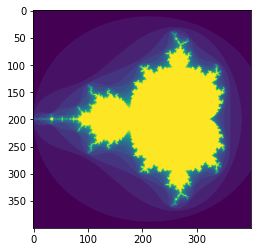

In [160]:
import numpy as np
import matplotlib.pyplot as plt
def mandelbrot(h, w, maxit = 20):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2     #who is diverging
        div_now = diverge & (divtime == maxit) #who is divergin
        divtime[div_now] = i
        z[diverge] = 2
        
    return divtime

plt.imshow(mandelbrot(400,400))

The second way of indexing with booleans is more similar to integer indexing;for each dimension of the array we give a 1D boolean arrays selecting the slices we want:

In [161]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False, True, True])
b2 = np.array([True, False, True, False])
a[b1,:]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [162]:
a[b1]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [163]:
a[:,b2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [164]:
a[b1,b2]

array([ 4, 10])

Note that the length of the 1D boolean array must coincide with the length of the dimension(or aixs) you want to slice.In the previous example, b1 has length3 (the number of rows in a), and b2 (of length 4) is suitable to index the 2nd aixs (columns) of a.

#### 3.The ix_() function
    The ix_() function can be used to combine different vectors so as to obtain the result for each nuplet.For example, if you want to compute all the a+b*c for all the triplets taken from each of the vectors a,b and c:

In [165]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])
ax, bx, cx = np.ix_(a,b,c)
ax

array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [166]:
bx

array([[[8],
        [5],
        [4]]])

In [168]:
cx

array([[[5, 4, 6, 8, 3]]])

In [170]:
ax.shape, bx.shape, cx.shape

((4, 1, 1), (1, 3, 1), (1, 1, 5))

In [171]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [173]:
result[3,2,4]

17

In [174]:
a[3] + b[2] * c[4]

17

You could also implement the reduce as follows:

In [175]:
def ufunc_reduce(ufct, *vectors):
    vs = np.ix_(*vectors)
    r = ufct.identity
    for v in vs:
        r = ufct(r,v)
    return r

and then use it as 

In [176]:
ufunc_reduce(np.add, a, b, c)

array([[[15, 14, 16, 18, 13],
        [12, 11, 13, 15, 10],
        [11, 10, 12, 14,  9]],

       [[16, 15, 17, 19, 14],
        [13, 12, 14, 16, 11],
        [12, 11, 13, 15, 10]],

       [[17, 16, 18, 20, 15],
        [14, 13, 15, 17, 12],
        [13, 12, 14, 16, 11]],

       [[18, 17, 19, 21, 16],
        [15, 14, 16, 18, 13],
        [14, 13, 15, 17, 12]]])

The advantage of this version of reduce compared to the normal ufunc.reduce is that it makes use of the broadcasting rules in order to avoid creating an argument array the size of the output times the number of vectors.

### Liner Algebra
    Work in progress. Basic liner algebra to be in cluded here

#### 1.Simple Array Operations
    See linalg.py in numpy folder for more.

In [177]:
import numpy as np
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

[[1. 2.]
 [3. 4.]]


In [178]:
a.transpose()

array([[1., 3.],
       [2., 4.]])

In [179]:
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [181]:
u = np.eye(2)
u

array([[1., 0.],
       [0., 1.]])

In [182]:
j = np.array([[0.0, -1.0], [1.0, 0.0]])
j @ j

array([[-1.,  0.],
       [ 0., -1.]])

In [184]:
np.trace(u)

2.0

In [185]:
y = np.array([[5.], [7.]])
np.linalg.solve(a,y)

array([[-3.],
       [ 4.]])

In [186]:
np.linalg.eig(j)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

Parameters:  
    ·square matrix  
Returns  
    ·The eigenvalues, each repeated according to its multiplicity.  
    ·The normalized (unit "length") eigenvectors, such that the column ``v[:,i]`` is the eigenvector corresponding to the eigenvalue ``w[i]``.

### Tricks and Tips
    Here we give a list of short and useful tips. 

#### 1."Automatic" Reshaping
    To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:
   

In [188]:
a = np.arange(30)
b = a.reshape((2, -1, 3))
b.shape

(2, 5, 3)

In [189]:
b 

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

#### 2.Vector Stacking
    How do we construct a 2D array from a list of equally-sized row vectors? In MATLAB this is quite easy: if x and y are two vectors of the same length you only need do m=[x;y].In NumPy this works via the functions column_stack, dstack, hstack and vstack, depending on the dimension in which the stacking is to be done. For example:

In [190]:
x = np.arange(0,10,2)
y = np.arange(5)
m = np.vstack([x,y])
m

array([[0, 2, 4, 6, 8],
       [0, 1, 2, 3, 4]])

In [191]:
xy = np.hstack([x,y])
xy

array([0, 2, 4, 6, 8, 0, 1, 2, 3, 4])

#### 3.Histograms
    The NumPy histogram function applied to an array returns a pair of vectors: the histogram of the array and a vector of the bin edges. Beware: matplotlib also has a function to build histograms (called hist,as in Matlab) that differs from the one in NumPy. The main difference is that pylab.hist plots the histogram automatically, while numpy.histogram only generates the data.

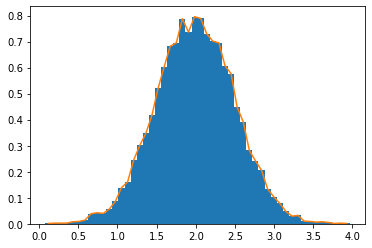

In [192]:
import numpy as np
rg = np.random.default_rng(1)
import matplotlib.pyplot as plt
#Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = rg.normal(mu, sigma, 10000)
#Plot a normalized histogram with 50 bins
plt.hist(v ,bins=50, density=1)      #matplotlib version (plot)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, density=True) #NumPy version(no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)